# Part b) Sharpening (3 x 3)

In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [42]:
def flipHorizontal(kernel):
    i = 0
    j = kernel.shape[1] - 1
    while True:
        if i == j:
            break
        else:
            for c in range(kernel.shape[0]):
                kernel[c][i], kernel[c][j] = kernel[c][j], kernel[c][i] #Swapping
            i = i + 1
            j = j - 1
    return kernel

def flipVertical(kernel):
    i = 0
    j = kernel.shape[0] - 1
    while True:
        if i == j:
            break
        else:
            for c in range(kernel.shape[1]):
                kernel[i][c], kernel[j][c] = kernel[j][c], kernel[i][c] #Swapping
            i = i + 1
            j = j - 1
    return kernel

def flip(kernel):
    kernel = flipHorizontal(kernel)
    kernel = flipVertical(kernel)
    return kernel

def multiply(A,B):
    ans = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            ans += A[i,j] * B[i,j]
    return ans

def normalize(image):
    maxV = image.max()
    minV = image.min()
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            image[i,j] = ((image[i,j]-minV)*255)/(maxV-minV)
    return image

def convolution(image,kernel):
    tempImg = np.zeros(shape=image.shape,dtype=int)
    count = int(kernel.shape[0]/2)
    for c in range(count):
        image = np.concatenate((np.zeros((image.shape[0],1), dtype=int), image), axis=1)
        image = np.concatenate((np.zeros((1,image.shape[1]), dtype=int), image), axis=0)
        image = np.append(image, np.zeros((1,image.shape[1]), dtype=int), axis=0)
        image = np.append(image, np.zeros((image.shape[0],1), dtype=int), axis=1)
    x,y = 0,0
    for i in range(0 + count,image.shape[0] - count):
        for j in range(0 + count, image.shape[1] - count):
            A = image[i-count:i+(count+1),j-count:j+(count+1)]
            tempImg[x,y] = multiply(A,kernel)
            y = y + 1
        x = x + 1
        y = 0
    return tempImg

def filter(image,kernel):
    newImg = np.zeros(shape=(image.shape[0],image.shape[1],3))
    kernel = flip(kernel)
    newImg[:,:,0] = convolution(image[:,:,0],kernel)
    newImg[:,:,1] = convolution(image[:,:,1],kernel)
    newImg[:,:,2] = convolution(image[:,:,2],kernel)
    return newImg

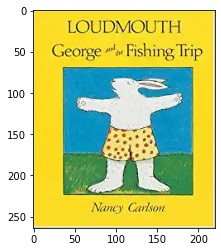

In [43]:
image = cv2.imread('book.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

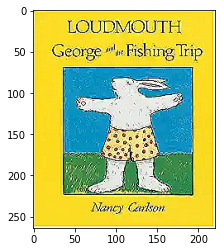

In [44]:
kernel3x3sharp = np.array([[0, -1,  0],[-1,  5, -1],[0, -1,  0]])
sharpImage3x3 = filter(image,kernel3x3sharp)
sharpImage3x3 = np.clip(sharpImage3x3,0,255)
sharpImage3x3 = sharpImage3x3.astype(int)
plt.imshow(sharpImage3x3)

In [47]:
cv2.imwrite('BSEF19M007_SHARP_3X3.png',sharpImage3x3)

True